<a href="https://colab.research.google.com/github/AgustinCocciardi/IA-Aplicada/blob/main/Encuesta_de_sueldos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_classification
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error,f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from collections import Counter

In [227]:
df = pd.read_csv("Sysarmy_Encuesta_salarial.csv")
df

,estoy_trabajando_en,donde_estas_trabajando,dedicacion,tipo_de_contrato,ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local,ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local,pagos_en_dolares,si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron,pagos_en_criptomonedas,que_porcentaje_o_monto_recibis_en_criptomonedas,...,salir_o_seguir_contestando_sobre_las_guardias,tenes_guardias,cuanto_cobras_por_guardia,porcentajebruto_o_neto,salir_o_seguir_contestando_sobre_estudios,tengo_edad,me_identifico_genero,sueldo_dolarizado,seniority,me_id_extra
0,Argentina,Buenos Aires,Full-Time,Staff (planta permanente),475480.0,396346,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,25,Varón Cis,False,Semi-Senior,Hombre Cis
1,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),260000.0,220000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,27,Mujer Cis,False,Junior,Mujer Cis
2,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),106350.0,88560,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21,Varón Cis,False,Junior,Hombre Cis
3,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),339000.0,283700,NaN,NaN,NaN,NaN,...,Terminar encuesta,No,0.0,Porcentaje de mi sueldo bruto,Responder sobre mis estudios,25,Varón Cis,False,Semi-Senior,Hombre Cis
4,Argentina,Río Negro,Full-Time,Staff (planta permanente),380000.0,320000,Mi sueldo está dolarizado (pero cobro en moned...,179,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,24,Varón Cis,True,Junior,Hombre Cis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5762,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),897000.0,540000,NaN,NaN,NaN,NaN,...,Responder sobre guardias,No,0.0,Bruto,Terminar encuesta,39,Varón Cis,False,Senior,Hombre Cis
5763,Argentina,Tucumán,Full-Time,Staff (planta permanente),130000.0,295000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,40,Varón Cis,False,Senior,Hombre Cis
5764,Argentina,Buenos Aires,Part-Time,Freelance,250000.0,250000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,21,Varón Cis,False,Senior,Hombre Cis
5765,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),230000.0,160000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,29,Varón Cis,False,Semi-Senior,Hombre Cis


In [ ]:
df['plataformas_que_utilizas_en_tu_puesto_actual']

,plataformas_que_utilizas_en_tu_puesto_actual
0,Docker
1,Azure
2,"Docker, Linux"
3,"Amazon Web Services, Docker, Linux, Serverless"
4,Docker
...,...
5762,"AIX, Azure, Linux, OpenShift, SAP, VMWare, Win..."
5763,"IBM Cloud / Watson, Linux, Windows Server"
5764,Ninguna de las anteriores
5765,"Linux, VMWare, Windows Server"


In [ ]:
df['frameworksherramientas_y_librerias_que_utilices_en_tu_puesto_actual']

,frameworksherramientas_y_librerias_que_utilices_en_tu_puesto_actual
0,-
1,React.js
2,".NET Core, Angular, Bootstrap, Node.js"
3,"Node.js, Spark"
4,"Next.js, Node.js, React.js"
...,...
5762,Ninguno de los anteriores
5763,Ninguno de los anteriores
5764,.NET Core
5765,Ninguno de los anteriores


In [ ]:
df['lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual']

,lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual
0,"Go, SQL"
1,Javascript
2,".NET, Bash/Shell, TypeScript"
3,"Java, Javascript, Python, SQL"
4,"CSS, HTML, Javascript"
...,...
5762,Ninguno de los anteriores
5763,Ninguno de los anteriores
5764,Ninguno de los anteriores
5765,Ninguno de los anteriores


In [ ]:
df['bases_de_datos']

,bases_de_datos
0,MySQL
1,MySQL
2,"Microsoft SQL Server, MySQL"
3,"Amazon DynamoDB, Amazon RDS/Aurora, PostgreSQL"
4,Ninguna de las anteriores
...,...
5762,"Microsoft Azure (Tables, CosmosDB, SQL, etc), ..."
5763,Ninguna de las anteriores
5764,Ninguna de las anteriores
5765,"MySQL, ProxySQL"


In [ ]:
df['qa_testing']

,qa_testing
0,Postman
1,"Cypress, Jest"
2,Visual Studio Coded UI
3,Jest
4,Jest
...,...
5762,Ninguna de las anteriores
5763,Ninguna de las anteriores
5764,Ninguna de las anteriores
5765,Selenium


In [228]:
frameworks = set()

palabras_a_excluir = {
    ' ', 'todo', 'in-house', 'plant applications', 'deja', 'para', 'ninguno',
    'seleccionar', 'solución', 'librerias', 'adelante', 'ninguna', 'aplica',
    'no', 'se', 'sé', 'programador', 'uso', 'otro', 'otros', 'estoy',
    'privado', 'propio', 'creados', 'sgsgsgsgd', '.net framework 4 en adelante','estoy en design',
    'framework privado de la empresa', 'framework propio','frameworks de go o creados en la compañía', 'frameworks php y javascript in-house', 'ge plant applications. osi pi.',
    'ktor y vertex para kotlin','librerías y frameworks de smalltalk','mi puesto es comercial. vendo un producto desarrollado en la empresa',
    'ninguno de los anteriores', 'ningúna', 'no aplica', 'no aplica al puesto', 'no deja seleccionar react', 'no lo se', 'no lo sé', 'no soy programador', 'no uso',
    'performarce)', 'solución de workflow', 'son boludos? revisen el formulario'
}

# Recorrer la columna y agregar los frameworks/herramientas a la lista
df['frameworksherramientas_y_librerias_que_utilices_en_tu_puesto_actual'].dropna().apply(
    lambda x: frameworks.update(set([item.strip().lower() for item in str(x).split(',')
                                     if len(item.strip()) > 1 and item.strip().lower() not in palabras_a_excluir]))
)

# Convertir el conjunto (set) en una lista y ordenar alfabéticamente
frameworks_lista = sorted(list(frameworks))

# Imprime la lista de elementos únicos en minúsculas, excluyendo opciones de un solo caracter
print(frameworks_lista)

['.net', '.net core', '.net framework', 'actix', 'adf oracle', 'adobe experience manager', 'airflow', 'akka', 'alm', 'android', 'angular', 'angular js', 'angularjs', 'ansible', 'apache camel', 'apache flink', 'apache nifi', 'apex', 'apollo', 'appium', 'asp', 'aura', 'autoc0de(automation mobile', 'bantotal', 'bartender (seagull scientific)', 'bazel', 'blazor', 'bootstrap', 'bouncycastle', 'bumpy', 'cakephp', 'capacitor', 'caret', 'carina', 'catboost', 'cats', 'cdk', 'celery', 'chakra ui', 'chi', 'cocoapods', 'codeigniter', 'cordova', 'cors (automation ia framework e2e)', 'curl', 'cvxpy', 'cypress', 'dapr', 'dbt', 'dbvisualizer', 'decision optimization', 'delta', 'deltalake', 'deno', 'divi builder', 'django', 'docplex', 'drools', 'dropwizard', 'drupal', 'dynamics 365', 'e2e', 'echo', 'eclipse rcp', 'editor notepad++', 'elixir', 'ember', 'erwin', 'esp-idf', 'etc', 'expo', 'express', 'express.js', 'extjs', 'fabric', 'fast api', 'fastapi', 'figma', 'filemaker', 'flask', 'flexmind', 'flutter

In [229]:
lenguajes = set()

palabras_a_excluir = {
    ' ', 'el de la propia empresa','estoy actualmente haciendo un curso de html con css', 'estoy en design','front (integracion de servicios', 'fsdgsdggd',
    'mi puesto es comercial. vendo un producto desarrollado en la empresa','ninguno de los anteriores', 'no aplica al puesto', 'no aplican', 'no soy programador',
    'otro', 'python muy basico', 'venta dev a medida y productos', 'otros', 'sql', 'html', 'css'
}

# Recorrer la columna y agregar los lenguajes/herramientas a la lista
df['lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual'].dropna().apply(
    lambda x: lenguajes.update(set([item.strip().lower() for item in str(x).split(',')
                                     if len(item.strip()) > 1 and item.strip().lower() not in palabras_a_excluir]))
)

# Convertir el conjunto (set) en una lista y ordenar alfabéticamente
lenguajes_lista = sorted(list(lenguajes))

# Imprime la lista de elementos únicos en minúsculas, excluyendo opciones de un solo caracter
print(lenguajes_lista)

['.net', 'abap', 'advpl', 'android', 'ansible', 'ansuble', 'apex', 'apex salesforce', 'apollographql', 'arduino', 'assembler', 'automation anywhere', 'aws cognito)', 'bash', 'bash/shell', 'basic', 'blue prism', 'blueprint', 'blueprism', 'bolero', 'bpm', 'c#', 'c++', 'c++ y c# visual basic', 'cics', 'clarion', 'clojure', 'cobol', 'control language', 'csv excel', 'dart', 'dax', 'delphi', 'deluge', 'elixir', 'erlang', 'esql', 'figma', 'flask', 'flutter', 'foxpro', 'gdscript', 'genexus', 'geopandas', 'go', 'google appscript', 'goole sql', 'gosu', 'grafana', 'grahql', 'graphql', 'groovy', 'hcl', 'htl', 'ibm integration bus', 'informix 4gl', 'ionic', 'java', 'javascript', 'jcl', 'jquery', 'kotlin', 'liquid', 'lua', 'matlab', 'microsoft excel', 'mongo', 'mongodb', 'mysql', 'natural', 'natural adabas', 'nifi', 'no-sql', 'nodejs', 'nose', 'nosql', 'nrql', 'objective-c', 'oracle', 'oracle developer', 'oracle form', 'oracle forms and apex', 'pandas', 'peoplecode', 'perl', 'php', 'pick  basic', 'p

In [230]:
databases = set()

palabras_a_excluir = {
    ' ', 'api de la companía que interactúa con dbs en aws', 'base de datos nativa de vfp', 'dgsdgsdgdfdfh', 'la propia de salesforce',
    'ninguna de las anteriores', 'no aplica', 'no lo se con seguridad', 'no manejo db en este proyecto', 'no sé', 'no uso',
    'sistema de la empresa (fury)', 'sistema interno de la compañía', 'otro', 'otros'
}

# Recorrer la columna y agregar los databases/herramientas a la lista
df['bases_de_datos'].dropna().apply(
    lambda x: databases.update(set([item.strip().lower() for item in str(x).split(',')
                                     if len(item.strip()) > 1 and item.strip().lower() not in palabras_a_excluir]))
)

# Convertir el conjunto (set) en una lista y ordenar alfabéticamente
databases_lista = sorted(list(databases))

# Imprime la lista de elementos únicos en minúsculas, excluyendo opciones de un solo caracter
print(databases_lista)

['access', 'adabas', 'aerospike', 'airflow', 'algolia', 'amazon dynamodb', 'amazon hbase', 'amazon neptune', 'amazon rds mysql', 'amazon rds/aurora', 'amazon redshift', 'amazon s3', 'ansi sql', 'apache hive', 'apollo', 'arangodb', 'as400', 'athena', 'beam', 'big query', 'big query...', 'bigquery', 'blockchain', 'cassandra', 'clickhouse', 'cloud logging', 'cloud monitoring', 'cloudant', 'cockroachdb', 'composer', 'core data', 'coredata', 'cosmosdb', 'couchbase', 'couchdb', 'databricks', 'dataflow', 'db2', 'dbeavcer', 'dbeaver', 'dbt', 'deltalake', 'dilligent / acl analytics', 'dremio', 'druid', 'dynamo', 'dynamodb', 'elasticsearch', 'elevatedb', 'estoy en design', 'etc)', 'file adabas', 'firebase', 'firebase database', 'firebird', 'firestore', 'foxpro', 'fury', 'fury - kvs', 'gcp big query', 'gemstone', 'gemstone/s', 'genexus', 'google bigquery', 'google cloud storage', 'goolge sql', 'graphql', 'h2', 'hana', 'heidisql', 'ibm db2', 'ignite', 'infinispan', 'influx', 'influxdb', 'informix'

In [231]:
qa = set()

palabras_a_excluir = {
    ' ', '--','de eso se encargan los qas', 'desconozco','estoy en design', 'excel y test manuales. horrible',
    'mi puesto es comercial. vendo un producto desarrollado en la empresa','ninguna', 'ningunas', 'ninguno', 'ningúna',
    'no aplica al puesto', 'no aplican', 'no estoy segura', 'no hago testing', 'no se', 'no soy tester', 'no sé 🤷', 'no usamos', 'no usamos testing', 'no utilizo',
    'otro', 'playwright (alternativa a selenium)', 'qatesting manual', 'qmetry en jira','somos re suicidas....',
    'somos una empresa en la que todo se testea mal', 'son boludos? revisen el formulario','test suite in sap solution manager',
    'testing de golang', 'testing library', 'testing manual', 'testing-library', 'todo',
    'tests para los controladores de salesforce (apex/java)', 'otro', 'otros', 'ninguna de las anteriores', 'no uso'
}

# Recorrer la columna y agregar los qa/herramientas a la lista
df['qa_testing'].dropna().apply(
    lambda x: qa.update(set([item.strip().lower() for item in str(x).split(',')
                                     if len(item.strip()) > 1 and item.strip().lower() not in palabras_a_excluir]))
)

# Convertir el conjunto (set) en una lista y ordenar alfabéticamente
qa_lista = sorted(list(qa))

# Imprime la lista de elementos únicos en minúsculas, excluyendo opciones de un solo caracter
print(qa_lista)

['2steps', 'acunetix', 'appium', 'behat', 'browserstack', 'chai', 'cmocka', 'cors(automation ia framework)', 'cucumber', 'cypress', 'detox', 'eclipse', 'eclipse rcptt', 'espresso', 'flutter test libraries', 'foundry', 'gherkins', 'ginkgo', 'go standard library', 'gomega', 'gomock', 'google test', 'great expectations', 'gtest', 'gxtest', 'hp loadrunner', 'hp uft', 'httpie', 'insomnia', 'insomnia rest', 'jasmine', 'jazmine', 'jenkins', 'jest', 'jira', 'jmeter', 'junit', 'k6', 'karate', 'karma', 'katalon', 'lippia', 'locust', 'micro focus application lifecycle management (alm qc)', 'microfocus quality center', 'mocha', 'mockito', 'moq', 'mstest', 'munit', 'nessu', 'nexpose', 'nunit', 'openqa', 'panaya', 'pest', 'pester', 'phpunit', 'pitest', 'playright', 'playwright', 'postman', 'powermock', 'powershell', 'proxy', 'puppeteer', 'pycharm', 'pytest', 'qase', 'qmetry', 'quick & nimble', 'quick and nimble', 'quick y nimble', 'ranorex', 'rapise', 'rcptt', 'rcptt (eclipse)', 'react testing libra

In [232]:
plataformas = set()

palabras_a_excluir = {
    ' ', '--','.jira service desk .uso de herramienta vnc viewer y remote desktop para conexiones remotas .uso de herramienta advanced host monitor para monitoreo de redes .configuración de impresoras.manejo de active directory',
    '11', 'aadd', 'otro', 'otros', 'arduino o similar','cms propio de la empresa','crm desarollo interno','electrónica','erp de la empresa','jarvis(interno de la empresa)',
    'mmmmm','ninguna de las anteriores', 'no lo se', 'noc','plataforma de la compañía que funciona sobre aws y gcp', 'plataforma propia de la empresa', 'plataformas custom de esta empresa',
    'propia de la empresa', 'propietarios','relacionados a data','se utiliza azure pero yo actualmente no tengo proyecto','software empresarial','soluciones hcis philips',
    'un dashboard de la empresa', 'una plataforma hecha por la propia empresa','zoho one y otras apps de zoho: salesiq'
}

# Recorrer la columna y agregar los qa/herramientas a la lista
df['plataformas_que_utilizas_en_tu_puesto_actual'].dropna().apply(
    lambda x: plataformas.update(set([item.strip().lower() for item in str(x).split(',')
                                     if len(item.strip()) > 1 and item.strip().lower() not in palabras_a_excluir]))
)

# Convertir el conjunto (set) en una lista y ordenar alfabéticamente
plataformas_lista = sorted(list(plataformas))

# Imprime la lista de elementos únicos en minúsculas, excluyendo opciones de un solo caracter
print(plataformas_lista)

['*bsd', 'active directory', 'active directory.', 'ad', 'adf', 'adobe ae / ps / ai / pr - figma', 'adobe cc', 'adobe experience manager', 'adobe suitte', 'aem', 'airflow', 'aix', 'alteryx', 'altium', 'amazon web services', 'amplitude', 'analytics', 'anaplan', 'android', 'android studio', 'angular', 'ansible', 'apache nifi', 'apache tomcat', 'api connect', 'apollo', 'appscript', 'appsflyer', 'argocd', 'aruba', 'as-400', 'as400', 'asana', 'ase sql', 'asterisk', 'atlasian', 'atlassian', 'audiocodes', 'automation anywhere', 'automation anywhere 360', 'avature', 'aws api gateway', 'aws aurora', 'aws codebuild', 'aws glue', 'aws lambda', 'azure', 'azure devops', 'backupexec', 'bases de datos', 'bbva ether platform', 'bdd', 'beamer', 'bi', 'big query', 'bigquery', 'bitbucket', 'bitrise', 'blockchain', 'blue prism', 'blueprism', 'bm', 'bugsnag', 'burp suite', 'burpsuite', 'calipso', 'calypso', 'cambium', 'check point', 'chess nexbin', 'cisco', 'cisco - f5 - fortinet - nsx', 'cisco ccw', 'cisco

# Trabajando con el Dataset

In [233]:
df.dtypes

,0
estoy_trabajando_en,object
donde_estas_trabajando,object
dedicacion,object
tipo_de_contrato,object
ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local,float64
ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local,object
pagos_en_dolares,object
si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron,object
pagos_en_criptomonedas,object
que_porcentaje_o_monto_recibis_en_criptomonedas,object


Me quedo con la siguiente lista de columnas

In [234]:
columnas_a_conservar = ['ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local',
                        'ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local','recibis_algun_tipo_de_bono','con_que_beneficios_contas',
                        'trabajo_de','anos_de_experiencia','plataformas_que_utilizas_en_tu_puesto_actual','lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual',
                        'frameworksherramientas_y_librerias_que_utilices_en_tu_puesto_actual','bases_de_datos','qa_testing','modalidad_de_trabajo',
                        'si_trabajas_bajo_un_esquema_hibrido_cuantos_dias_a_la_semana_vas_a_la_oficina']

In [235]:
df_modificado = df[columnas_a_conservar].copy()

In [236]:
df_modificado.rename(columns={
    "ultimo_salario_mensual_o_retiro_bruto_en_tu_moneda_local": "salario_bruto",
    "ultimo_salario_mensual_o_retiro_neto_en_tu_moneda_local" : "salario_neto",
    "recibis_algun_tipo_de_bono": "cobra_bono",
    "con_que_beneficios_contas": "beneficios",
    "anos_de_experiencia":"experiencia",
    "plataformas_que_utilizas_en_tu_puesto_actual":"plataformas",
    "lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual":"lenguajes",
    "frameworksherramientas_y_librerias_que_utilices_en_tu_puesto_actual":"frameworks",
    "modalidad_de_trabajo":"modalidad",
    "si_trabajas_bajo_un_esquema_hibrido_cuantos_dias_a_la_semana_vas_a_la_oficina":"horas_oficina",
    "bases_de_datos":"databases"
}, inplace=True)

In [237]:
df_modificado

,salario_bruto,salario_neto,cobra_bono,beneficios,trabajo_de,experiencia,plataformas,lenguajes,frameworks,databases,qa_testing,modalidad,horas_oficina
0,475480.0,396346,Menos de un sueldo,"Capacitaciones y/o cursos, Descuento en gimnas...",Developer,3.0,Docker,"Go, SQL",-,MySQL,Postman,100% remoto,0
1,260000.0,220000,No,"Abono de Internet, Capacitaciones y/o cursos, ...",Developer,2.0,Azure,Javascript,React.js,MySQL,"Cypress, Jest",100% remoto,0
2,106350.0,88560,No,"Capacitaciones y/o cursos, Descuento en gimnas...",Developer,0.0,"Docker, Linux",".NET, Bash/Shell, TypeScript",".NET Core, Angular, Bootstrap, Node.js","Microsoft SQL Server, MySQL",Visual Studio Coded UI,Híbrido (presencial y remoto),1
3,339000.0,283700,Un sueldo,"Abono de Internet, Capacitaciones y/o cursos, ...",Developer,3.0,"Amazon Web Services, Docker, Linux, Serverless","Java, Javascript, Python, SQL","Node.js, Spark","Amazon DynamoDB, Amazon RDS/Aurora, PostgreSQL",Jest,100% remoto,0
4,380000.0,320000,Un sueldo,Descuento en gimnasios / Clases de gimnasia on...,Developer,0.0,Docker,"CSS, HTML, Javascript","Next.js, Node.js, React.js",Ninguna de las anteriores,Jest,100% remoto,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5762,897000.0,540000,De uno a tres sueldos,"Abono de celular, Abono de Internet, Capacitac...",Manager / Director,18.0,"AIX, Azure, Linux, OpenShift, SAP, VMWare, Win...",Ninguno de los anteriores,Ninguno de los anteriores,"Microsoft Azure (Tables, CosmosDB, SQL, etc), ...",Ninguna de las anteriores,100% remoto,0
5763,130000.0,295000,Un sueldo,"Abono de celular, Cuota para universidad / pos...",Technical Leader,17.0,"IBM Cloud / Watson, Linux, Windows Server",Ninguno de los anteriores,Ninguno de los anteriores,Ninguna de las anteriores,Ninguna de las anteriores,100% presencial,0
5764,250000.0,250000,No,Horarios flexibles,Storage / Backup,7.0,Ninguna de las anteriores,Ninguno de los anteriores,.NET Core,Ninguna de las anteriores,Ninguna de las anteriores,Híbrido (presencial y remoto),3
5765,230000.0,160000,No,Horarios flexibles,Networking,4.0,"Linux, VMWare, Windows Server",Ninguno de los anteriores,Ninguno de los anteriores,"MySQL, ProxySQL",Selenium,100% presencial,0


Factorizamos las columnas con valores categoricos

Factorización de Modalidad

In [239]:
# Reemplazar los valores en la columna 'modalidad'
df_modificado['modalidad'] = df_modificado['modalidad'].replace({
    '100% remoto': 0,
    'Híbrido (presencial y remoto)': 1,
    '100% presencial': 2
})

[0 1 2]


Factorización de cobra_bono

In [241]:
# Reemplazar los valores en la columna 'cobra_bono'
df_modificado['cobra_bono'] = df_modificado['cobra_bono'].replace({
    'No': 0,
    'Menos de un sueldo': 1,
    'Un sueldo': 2,
    'De uno a tres sueldos': 3,
    '3+ sueldos': 4
})

# Verificar los cambios
print(df_modificado['cobra_bono'].unique())

[1 0 2 4 3]


In [224]:
# Listar las columnas a factorizar
columnas_a_factorizar = ['cobra_bono', 'trabajo_de', 'modalidad']

# Factorizar cada columna en la lista
for columna in columnas_a_factorizar:
    df_modificado[columna] = pd.factorize(df_modificado[columna])[0]

In [225]:
df_modificado

,salario_bruto,salario_neto,cobra_bono,beneficios,trabajo_de,experiencia,plataformas,lenguajes,frameworks,databases,qa_testing,modalidad,horas_oficina
0,475480.0,396346,0,"Capacitaciones y/o cursos, Descuento en gimnas...",0,3.0,Docker,"Go, SQL",-,MySQL,Postman,0,0
1,260000.0,220000,1,"Abono de Internet, Capacitaciones y/o cursos, ...",0,2.0,Azure,Javascript,React.js,MySQL,"Cypress, Jest",0,0
2,106350.0,88560,1,"Capacitaciones y/o cursos, Descuento en gimnas...",0,0.0,"Docker, Linux",".NET, Bash/Shell, TypeScript",".NET Core, Angular, Bootstrap, Node.js","Microsoft SQL Server, MySQL",Visual Studio Coded UI,1,1
3,339000.0,283700,2,"Abono de Internet, Capacitaciones y/o cursos, ...",0,3.0,"Amazon Web Services, Docker, Linux, Serverless","Java, Javascript, Python, SQL","Node.js, Spark","Amazon DynamoDB, Amazon RDS/Aurora, PostgreSQL",Jest,0,0
4,380000.0,320000,2,Descuento en gimnasios / Clases de gimnasia on...,0,0.0,Docker,"CSS, HTML, Javascript","Next.js, Node.js, React.js",Ninguna de las anteriores,Jest,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5762,897000.0,540000,4,"Abono de celular, Abono de Internet, Capacitac...",12,18.0,"AIX, Azure, Linux, OpenShift, SAP, VMWare, Win...",Ninguno de los anteriores,Ninguno de los anteriores,"Microsoft Azure (Tables, CosmosDB, SQL, etc), ...",Ninguna de las anteriores,0,0
5763,130000.0,295000,2,"Abono de celular, Cuota para universidad / pos...",2,17.0,"IBM Cloud / Watson, Linux, Windows Server",Ninguno de los anteriores,Ninguno de los anteriores,Ninguna de las anteriores,Ninguna de las anteriores,2,0
5764,250000.0,250000,1,Horarios flexibles,142,7.0,Ninguna de las anteriores,Ninguno de los anteriores,.NET Core,Ninguna de las anteriores,Ninguna de las anteriores,1,3
5765,230000.0,160000,1,Horarios flexibles,17,4.0,"Linux, VMWare, Windows Server",Ninguno de los anteriores,Ninguno de los anteriores,"MySQL, ProxySQL",Selenium,2,0


Cuento los valores nulos de cada columna

In [189]:
# Contar los valores nulos en cada columna
nulos_por_columna = df_modificado.isnull().sum()

# Imprimir el conteo de valores nulos por columna
print(nulos_por_columna)


provincia          0
dedicacion         0
salario_bruto      0
salario_neto     210
cobra_bono         0
beneficios         0
trabajo_de         0
experiencia        0
plataformas        2
lenguajes          0
frameworks         1
databases          1
qa_testing         5
modalidad          0
horas_oficina      0
dtype: int64


Dropeo las filas donde haya nulos en plataformas, frameworks, bases_de_datos y qa_testing ya que son muy pocos registros.

In [190]:
# Dropear filas donde las columnas especificadas sean nulas
df_modificado = df_modificado.dropna(subset=['plataformas', 'frameworks', 'databases', 'qa_testing'])

# Contar los valores nulos en cada columna
nulos_por_columna = df_modificado.isnull().sum()

# Imprimir el conteo de valores nulos por columna
print(nulos_por_columna)


provincia          0
dedicacion         0
salario_bruto      0
salario_neto     209
cobra_bono         0
beneficios         0
trabajo_de         0
experiencia        0
plataformas        0
lenguajes          0
frameworks         0
databases          0
qa_testing         0
modalidad          0
horas_oficina      0
dtype: int64


Imputo los nulos de salario_neto para reemplazarlos por la media

In [191]:
# Convertir la columna 'salario_neto' a tipo numérico, forzando errores a NaN
df_modificado['salario_neto'] = pd.to_numeric(df_modificado['salario_neto'], errors='coerce')

# Calcular la media de la columna 'salario_neto' (ignorando nulos)
media_salario_neto = df_modificado['salario_neto'].mean()

# Imputar los valores nulos en la columna 'salario_neto' con la media
df_modificado['salario_neto'].fillna(media_salario_neto, inplace=True)

<ipython-input-191-6ab93023d8c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modificado['salario_neto'] = pd.to_numeric(df_modificado['salario_neto'], errors='coerce')
<ipython-input-191-6ab93023d8c2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modificado['salario_neto'].fillna(media_salario_neto, inplace=True)


In [192]:
# Contar los valores nulos en cada columna
nulos_por_columna = df_modificado.isnull().sum()

# Imprimir el conteo de valores nulos por columna
print(nulos_por_columna)


provincia        0
dedicacion       0
salario_bruto    0
salario_neto     0
cobra_bono       0
beneficios       0
trabajo_de       0
experiencia      0
plataformas      0
lenguajes        0
frameworks       0
databases        0
qa_testing       0
modalidad        0
horas_oficina    0
dtype: int64


In [193]:
df_modificado

,provincia,dedicacion,salario_bruto,salario_neto,cobra_bono,beneficios,trabajo_de,experiencia,plataformas,lenguajes,frameworks,databases,qa_testing,modalidad,horas_oficina
0,0,0,475480.0,396346.0,0,"Capacitaciones y/o cursos, Descuento en gimnas...",0,3.0,Docker,"Go, SQL",-,MySQL,Postman,0,0
1,1,0,260000.0,220000.0,1,"Abono de Internet, Capacitaciones y/o cursos, ...",0,2.0,Azure,Javascript,React.js,MySQL,"Cypress, Jest",0,0
2,1,0,106350.0,88560.0,1,"Capacitaciones y/o cursos, Descuento en gimnas...",0,0.0,"Docker, Linux",".NET, Bash/Shell, TypeScript",".NET Core, Angular, Bootstrap, Node.js","Microsoft SQL Server, MySQL",Visual Studio Coded UI,1,1
3,1,0,339000.0,283700.0,2,"Abono de Internet, Capacitaciones y/o cursos, ...",0,3.0,"Amazon Web Services, Docker, Linux, Serverless","Java, Javascript, Python, SQL","Node.js, Spark","Amazon DynamoDB, Amazon RDS/Aurora, PostgreSQL",Jest,0,0
4,2,0,380000.0,320000.0,2,Descuento en gimnasios / Clases de gimnasia on...,0,0.0,Docker,"CSS, HTML, Javascript","Next.js, Node.js, React.js",Ninguna de las anteriores,Jest,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5762,1,0,897000.0,540000.0,4,"Abono de celular, Abono de Internet, Capacitac...",12,18.0,"AIX, Azure, Linux, OpenShift, SAP, VMWare, Win...",Ninguno de los anteriores,Ninguno de los anteriores,"Microsoft Azure (Tables, CosmosDB, SQL, etc), ...",Ninguna de las anteriores,0,0
5763,17,0,130000.0,295000.0,2,"Abono de celular, Cuota para universidad / pos...",2,17.0,"IBM Cloud / Watson, Linux, Windows Server",Ninguno de los anteriores,Ninguno de los anteriores,Ninguna de las anteriores,Ninguna de las anteriores,2,0
5764,0,1,250000.0,250000.0,1,Horarios flexibles,142,7.0,Ninguna de las anteriores,Ninguno de los anteriores,.NET Core,Ninguna de las anteriores,Ninguna de las anteriores,1,3
5765,1,0,230000.0,160000.0,1,Horarios flexibles,17,4.0,"Linux, VMWare, Windows Server",Ninguno de los anteriores,Ninguno de los anteriores,"MySQL, ProxySQL",Selenium,2,0


Obtengo los beneficios más comunes en el listado

In [194]:
# Lista de beneficios a excluir
excluir_beneficios = {"etc", "ninguna de las anteriores"}

# Concatenar todos los beneficios en una sola lista, excluyendo los que no te interesan
todos_beneficios = df_modificado['beneficios'].dropna().apply(
    lambda x: [beneficio.strip().lower() for beneficio in x.split(',') if beneficio.strip().lower() not in excluir_beneficios]
)

# Flatten la lista de listas a una sola lista
todos_beneficios_flat = [beneficio for sublist in todos_beneficios for beneficio in sublist]

# Contar la frecuencia de cada beneficio
beneficios_contados = Counter(todos_beneficios_flat)

# Imprimir los beneficios más comunes
beneficios_comunes = beneficios_contados.most_common(5)  # Puedes limitar con most_common(n) si solo quieres los más comunes

beneficios_comunes

[('capacitaciones y/o cursos', 3268),
 ('horarios flexibles', 3219),
 ('clases de idiomas', 2244),
 ('vacaciones flexibles (adicionales a las reglamentarias)', 2106),
 ('abono de internet', 2065)]

Analizo frameworks

In [195]:
# Crear la nueva columna 'cantidadFrameworks' contando solo los frameworks que están en frameworks_lista
df_modificado['cantidadFrameworks'] = df_modificado['frameworks'].apply(
    lambda x: len([fw.strip().lower() for fw in str(x).split(',') if fw.strip().lower() in frameworks_lista])
)

# Imprimir el DataFrame modificado con la nueva columna
print(df_modificado[['frameworks', 'cantidadFrameworks']])

                                             frameworks  cantidadFrameworks
0                                                     -                   0
1                                              React.js                   1
2                .NET Core, Angular, Bootstrap, Node.js                   4
3                                        Node.js, Spark                   2
4                            Next.js, Node.js, React.js                   3
...                                                 ...                 ...
5762                          Ninguno de los anteriores                   0
5763                          Ninguno de los anteriores                   0
5764                                          .NET Core                   1
5765                          Ninguno de los anteriores                   0
5766  Django, Hibernate, Next.js, Node.js, React.js,...                   6

[5760 rows x 2 columns]


<ipython-input-195-aa41d67a2206>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modificado['cantidadFrameworks'] = df_modificado['frameworks'].apply(


In [196]:
# Filtrar los frameworks solo si están en frameworks_lista
todos_frameworks = df_modificado['frameworks'].dropna().apply(
    lambda x: [fw.strip().lower() for fw in x.split(',') if fw.strip().lower() in frameworks_lista]
)

# Flatten la lista de listas a una sola lista
todos_frameworks_flat = [fw for sublist in todos_frameworks for fw in sublist]

# Contar la frecuencia de cada framework
frameworks_contados = Counter(todos_frameworks_flat)

# Obtener los frameworks más comunes
frameworks_comunes = frameworks_contados.most_common(5)

# Imprimir los frameworks más comunes
frameworks_comunes

[('node.js', 1088),
 ('react.js', 1065),
 ('bootstrap', 796),
 ('.net core', 649),
 ('jquery', 620)]

Analizo plataformas

In [197]:
df_modificado['cantidadPlataformas'] = df_modificado['plataformas'].apply(
    lambda x: len([fw.strip().lower() for fw in str(x).split(',') if fw.strip().lower() in plataformas_lista])
)

# Imprimir el DataFrame modificado con la nueva columna
print(df_modificado[['plataformas', 'cantidadPlataformas']])

                                            plataformas  cantidadPlataformas
0                                                Docker                    1
1                                                 Azure                    1
2                                         Docker, Linux                    2
3        Amazon Web Services, Docker, Linux, Serverless                    4
4                                                Docker                    1
...                                                 ...                  ...
5762  AIX, Azure, Linux, OpenShift, SAP, VMWare, Win...                    7
5763          IBM Cloud / Watson, Linux, Windows Server                    3
5764                          Ninguna de las anteriores                    0
5765                      Linux, VMWare, Windows Server                    3
5766   Docker, Google Cloud Platform, Kubernetes, Linux                    4

[5760 rows x 2 columns]


<ipython-input-197-05bf0f8d1d1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modificado['cantidadPlataformas'] = df_modificado['plataformas'].apply(


In [198]:
# Filtrar las plataformas solo si están en plataformas_lista
todas_plataformas = df_modificado['plataformas'].dropna().apply(
    lambda x: [plataforma.strip().lower() for plataforma in x.split(',') if plataforma.strip().lower() in plataformas_lista]
)

# Flatten la lista de listas a una sola lista
todas_plataformas_flat = [plataforma for sublist in todas_plataformas for plataforma in sublist]

# Contar la frecuencia de cada plataforma
plataformas_contadas = Counter(todas_plataformas_flat)

# Obtener las plataformas más comunes
plataformas_comunes = plataformas_contadas.most_common(5)

# Imprimir las plataformas más comunes
plataformas_comunes

[('linux', 2160),
 ('docker', 1972),
 ('amazon web services', 1644),
 ('windows server', 1325),
 ('azure', 1114)]

Analizo lenguajes

In [199]:
df_modificado['cantidadLenguajes'] = df_modificado['lenguajes'].apply(
    lambda x: len([fw.strip().lower() for fw in str(x).split(',') if fw.strip().lower() in lenguajes_lista])
)

# Imprimir el DataFrame modificado con la nueva columna
print(df_modificado[['lenguajes', 'cantidadLenguajes']])

                                              lenguajes  cantidadLenguajes
0                                               Go, SQL                  1
1                                            Javascript                  1
2                          .NET, Bash/Shell, TypeScript                  3
3                         Java, Javascript, Python, SQL                  3
4                                 CSS, HTML, Javascript                  1
...                                                 ...                ...
5762                          Ninguno de los anteriores                  0
5763                          Ninguno de los anteriores                  0
5764                          Ninguno de los anteriores                  0
5765                          Ninguno de los anteriores                  0
5766  CSS, HTML, Java, Javascript, Python, SQL, Type...                  4

[5760 rows x 2 columns]


<ipython-input-199-a35cce5e4aa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modificado['cantidadLenguajes'] = df_modificado['lenguajes'].apply(


In [200]:
# Filtrar los lenguajes solo si están en lenguajes_lista
todos_lenguajes = df_modificado['lenguajes'].dropna().apply(
    lambda x: [lenguaje.strip().lower() for lenguaje in x.split(',') if lenguaje.strip().lower() in lenguajes_lista]
)

# Flatten la lista de listas a una sola lista
todos_lenguajes_flat = [lenguaje for sublist in todos_lenguajes for lenguaje in sublist]

# Contar la frecuencia de cada lenguaje
lenguajes_contados = Counter(todos_lenguajes_flat)

# Obtener los lenguajes más comunes
lenguajes_comunes = lenguajes_contados.most_common(5)

# Imprimir los lenguajes más comunes
lenguajes_comunes

[('javascript', 2249),
 ('python', 1498),
 ('java', 1055),
 ('typescript', 995),
 ('bash/shell', 868)]

Analizo bases de datos

In [201]:
df_modificado['cantidadBases'] = df_modificado['databases'].apply(
    lambda x: len([fw.strip().lower() for fw in str(x).split(',') if fw.strip().lower() in databases_lista])
)

# Imprimir el DataFrame modificado con la nueva columna
print(df_modificado[['databases', 'cantidadBases']])

                                              databases  cantidadBases
0                                                 MySQL              1
1                                                 MySQL              1
2                           Microsoft SQL Server, MySQL              2
3        Amazon DynamoDB, Amazon RDS/Aurora, PostgreSQL              3
4                             Ninguna de las anteriores              0
...                                                 ...            ...
5762  Microsoft Azure (Tables, CosmosDB, SQL, etc), ...              6
5763                          Ninguna de las anteriores              0
5764                          Ninguna de las anteriores              0
5765                                    MySQL, ProxySQL              2
5766          Google Cloud Storage, MongoDB, PostgreSQL              3

[5760 rows x 2 columns]


<ipython-input-201-ccd68f8ead62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modificado['cantidadBases'] = df_modificado['databases'].apply(


In [202]:
# Filtrar las bases de datos solo si están en databases_lista
todas_databases = df_modificado['databases'].dropna().apply(
    lambda x: [db.strip().lower() for db in x.split(',') if db.strip().lower() in databases_lista]
)

# Flatten la lista de listas a una sola lista
todas_databases_flat = [db for sublist in todas_databases for db in sublist]

# Contar la frecuencia de cada base de datos
databases_contadas = Counter(todas_databases_flat)

# Obtener las bases de datos más comunes
databases_comunes = databases_contadas.most_common(5)

# Imprimir las bases de datos más comunes
databases_comunes

[('mysql', 1788),
 ('microsoft sql server', 1569),
 ('postgresql', 1182),
 ('mongodb', 821),
 ('oracle', 698)]

Analizo qa_testing

In [207]:
df_modificado['cantidadQa'] = df_modificado['qa_testing'].apply(
    lambda x: len([fw.strip().lower() for fw in str(x).split(',') if fw.strip().lower() in qa_lista])
)

# Imprimir el DataFrame modificado con la nueva columna
print(df_modificado[['qa_testing', 'cantidadQa']])

                       qa_testing  cantidadQa
0                         Postman           1
1                   Cypress, Jest           2
2          Visual Studio Coded UI           1
3                            Jest           1
4                            Jest           1
...                           ...         ...
5762    Ninguna de las anteriores           0
5763    Ninguna de las anteriores           0
5764    Ninguna de las anteriores           0
5765                     Selenium           1
5766  Jest, JUnit, Mocha, Postman           4

[5760 rows x 2 columns]


<ipython-input-207-b06a2fc23003>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modificado['cantidadQa'] = df_modificado['qa_testing'].apply(


In [208]:
# Filtrar los elementos en qa_testing solo si están en qa_lista
todos_qa_testing = df_modificado['qa_testing'].dropna().apply(
    lambda x: [qa.strip().lower() for qa in x.split(',') if qa.strip().lower() in qa_lista]
)

# Flatten la lista de listas a una sola lista
todos_qa_testing_flat = [qa for sublist in todos_qa_testing for qa in sublist]

# Contar la frecuencia de cada elemento en qa_testing
qa_testing_contados = Counter(todos_qa_testing_flat)

# Obtener los elementos más comunes
qa_testing_comunes = qa_testing_contados.most_common(5)

# Imprimir los elementos más comunes en qa_testing
qa_testing_comunes

[('postman', 1134),
 ('junit', 537),
 ('jest', 477),
 ('selenium', 295),
 ('cypress', 247)]

In [246]:
# Hacer una copia de la columna 'trabajo_de'
copia_trabajo_de = df_modificado['trabajo_de'].copy()

# Verificar la copia
print(copia_trabajo_de)



0                Developer
1                Developer
2                Developer
3                Developer
4                Developer
               ...        
5762    Manager / Director
5763      Technical Leader
5764      Storage / Backup
5765            Networking
5766      Technical Leader
Name: trabajo_de, Length: 5767, dtype: object


In [247]:
# Lista de roles laborales permitidos
roles_permitidos = [
    'Developer',
    'SysAdmin / DevOps / SRE',
    'Technical Leader',
    'QA / Tester',
    'Manager / Director',
    'BI Analyst / Data Analyst',
    'HelpDesk',
    'Project Manager',
    'Data Engineer',
    'Data Scientist',
    'UX Designer',
    'Architect'
]

# Reemplazar el contenido en copia_trabajo_de
copia_trabajo_de = copia_trabajo_de.apply(lambda x: x if x in roles_permitidos else 'Otro')

# Verificar los cambios
print(copia_trabajo_de)


0                Developer
1                Developer
2                Developer
3                Developer
4                Developer
               ...        
5762    Manager / Director
5763      Technical Leader
5764                  Otro
5765                  Otro
5766      Technical Leader
Name: trabajo_de, Length: 5767, dtype: object


trabajo_de
Developer                    2219
Otro                         1140
SysAdmin / DevOps / SRE       534
Technical Leader              359
QA / Tester                   241
Manager / Director            207
BI Analyst / Data Analyst     204
HelpDesk                      187
Project Manager               166
Data Engineer                 142
Data Scientist                130
UX Designer                   123
Architect                     115
Name: count, dtype: int64


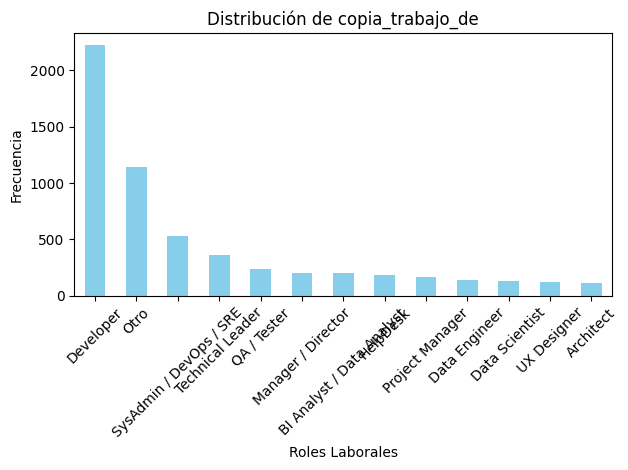

In [248]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar la distribución de valores en copia_trabajo_de
distribucion = copia_trabajo_de.value_counts()

# Imprimir la distribución
print(distribucion)

# Visualizar la distribución en un gráfico de barras
distribucion.plot(kind='bar', color='skyblue')
plt.title('Distribución de copia_trabajo_de')
plt.xlabel('Roles Laborales')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.tight_layout()  # Ajusta el layout para que no se corten las etiquetas
plt.show()


In [250]:
import pandas as pd

# Filtrar los registros donde el valor es 'Developer'
developers = df_modificado[df_modificado['copia_trabajo_de'] == 'Developer']

# Calcular cuántos registros son la mitad
n_developers_a_dropear = len(developers) // 2

# Seleccionar aleatoriamente la mitad de los registros
developers_a_dropear = developers.sample(n=n_developers_a_dropear, random_state=42)

# Dropear los registros seleccionados del DataFrame original
df_modificado = df_modificado.drop(developers_a_dropear.index)

# Verificar los cambios
print(df_modificado['copia_trabajo_de'].value_counts())


KeyError: 'copia_trabajo_de'